In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
rcParams['figure.figsize'] = 10, 6

In [2]:
df = pd.read_csv("AirPassengers.csv")
# parsing strings with datetime type
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format = True)
indexData = df.set_index(['Month'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_11936\811924594.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format = True)


In [3]:
from datetime import datetime
indexData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
indexData.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


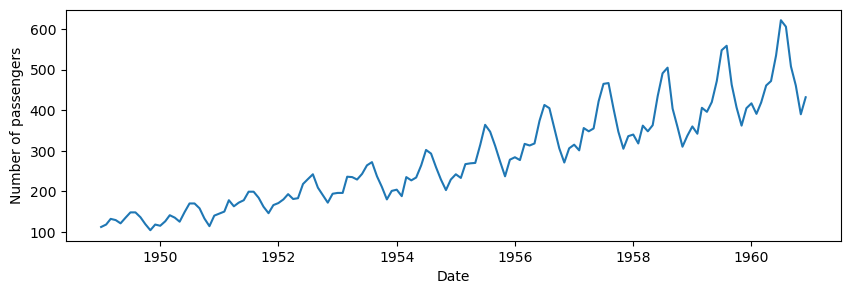

In [5]:
# plotting the graph 
plt.figure(figsize=(10,3))
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.plot(indexData)

In [6]:
# since clearly we can sense that our data is not stationary, thus we will check stationarity of data using tests
# determinig rolling statistics
rolmean = indexData.rolling(window=12).mean() #here window=12 means 12 months i.e our forecast is on basis of months, if we need to do it on basis
# of days then window=365
rolstd = indexData.rolling(window=12).std() #window=12 same reason as above
print(rolmean,rolstd)
# in the below result we can see that for each year starting 11 months are nan this is because start 11 months values avg is shown in 12th month

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


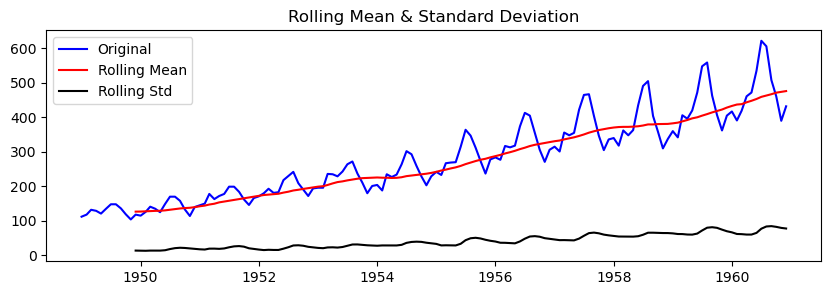

In [7]:
# plotting our rolling statistics
plt.figure(figsize=(10,3))
orig = plt.plot(indexData, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std =  plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
# Thus we can now clearly say that as our mean and std are not constant so our data is not stationary
# for our time series analysis we need to make it stationary, so we will perform dickey-fuller teest

In [9]:
# Performing Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey-Fuller test')
dftest = adfuller(indexData['#Passengers'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of observation Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Result of Dickey-Fuller test
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


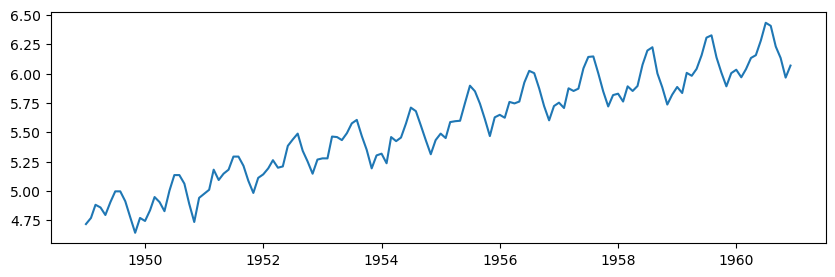

In [10]:
# Estimating Trends
plt.figure(figsize=(10,3))
indexData_logScale = np.log(indexData)
plt.plot(indexData_logScale)

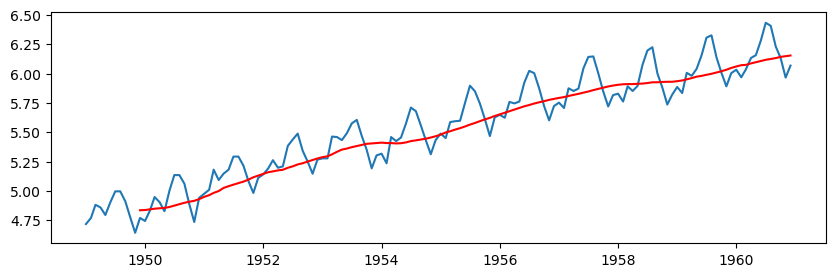

In [11]:
plt.figure(figsize=(10,3))
movingAverage = indexData_logScale.rolling(window=12).mean()
movingStd = indexData_logScale.rolling(window=12).std()
plt.plot(indexData_logScale)
plt.plot(movingAverage, color='red')

In [12]:
# we will sub log scale and moving avg
dataLMMa = indexData_logScale - movingAverage
dataLMMa.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [13]:
# removing nan value
dataLMMa.dropna(inplace=True)
dataLMMa.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [14]:
from statsmodels.tsa.stattools import adfuller #adfuller is augumented dickey fuller test
def test_stationary(timeseries):

    # determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()

    # plotting rolling statistics
    plt.figure(figsize=(10,3))
    orig = plt.plot(timeseries, color='blue', label='original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingStd, color='black', label='Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling mean & Std deviation')
    plt.show(block=False)

    # performing dickey fller test
    print('Result of Dickey Fuller test')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['test Statistics', 'p-value', '#lag used', 'Number of Observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

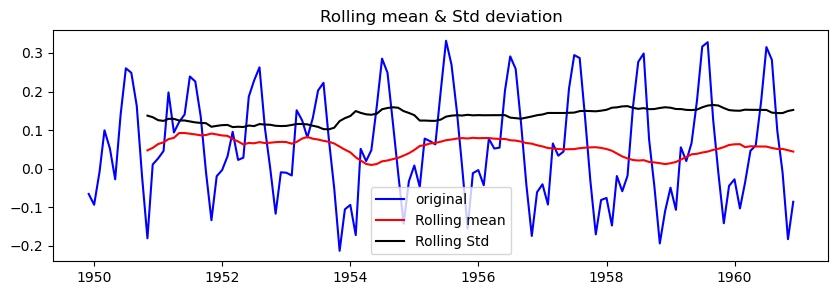

Result of Dickey Fuller test
test Statistics            -3.162908
p-value                     0.022235
#lag used                  13.000000
Number of Observations    119.000000
Critical Value (1%)        -3.486535
Critical Value (5%)        -2.886151
Critical Value (10%)       -2.579896
dtype: float64


In [15]:
test_stationary(dataLMMa)

In [16]:
# in rolling stats data also we can see that mean and std are balanced
# also in dickey fuller test p-value is now minimum and test stats value and Critical Value(1%) are nearly equal which indicated our data is now
# stationary

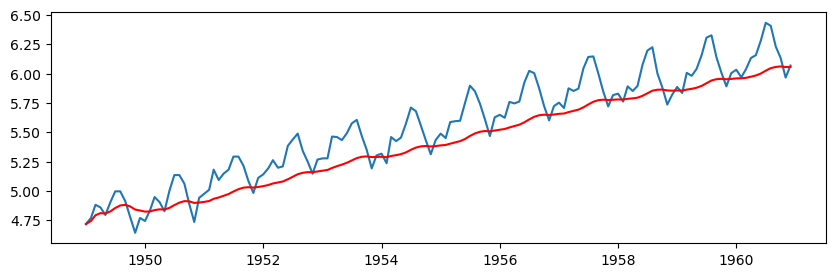

In [17]:
# now we will calculate the weighted avg of time series
exponentialDecayWeightedAvg = indexData_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.figure(figsize=(10,3))
plt.plot(indexData_logScale)
plt.plot(exponentialDecayWeightedAvg, color='red')
# we can see that as the time series is progressing the avg is also progressing, to upwards side

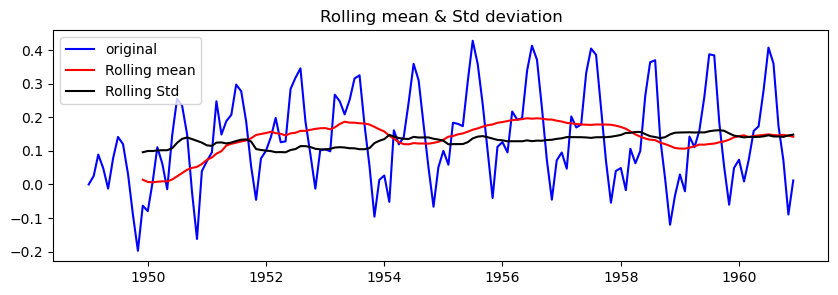

Result of Dickey Fuller test
test Statistics            -3.601262
p-value                     0.005737
#lag used                  13.000000
Number of Observations    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


In [18]:
dataLMMa = indexData_logScale-exponentialDecayWeightedAvg
test_stationary(dataLMMa)
# clearly p-value is quite less i.e time-series is stationary

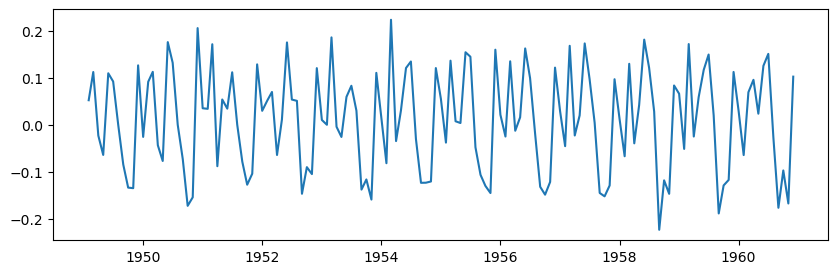

In [19]:
# now we will ship the values into time series for forecasting
dfLogDiffShift = indexData_logScale - indexData_logScale.shift()
plt.figure(figsize=(10,3))
plt.plot(dfLogDiffShift)

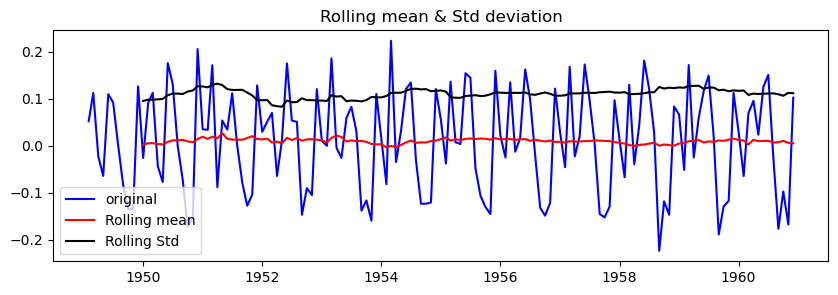

Result of Dickey Fuller test
test Statistics            -2.717131
p-value                     0.071121
#lag used                  14.000000
Number of Observations    128.000000
Critical Value (1%)        -3.482501
Critical Value (5%)        -2.884398
Critical Value (10%)       -2.578960
dtype: float64


In [20]:
dfLogDiffShift.dropna(inplace=True)
test_stationary(dfLogDiffShift)

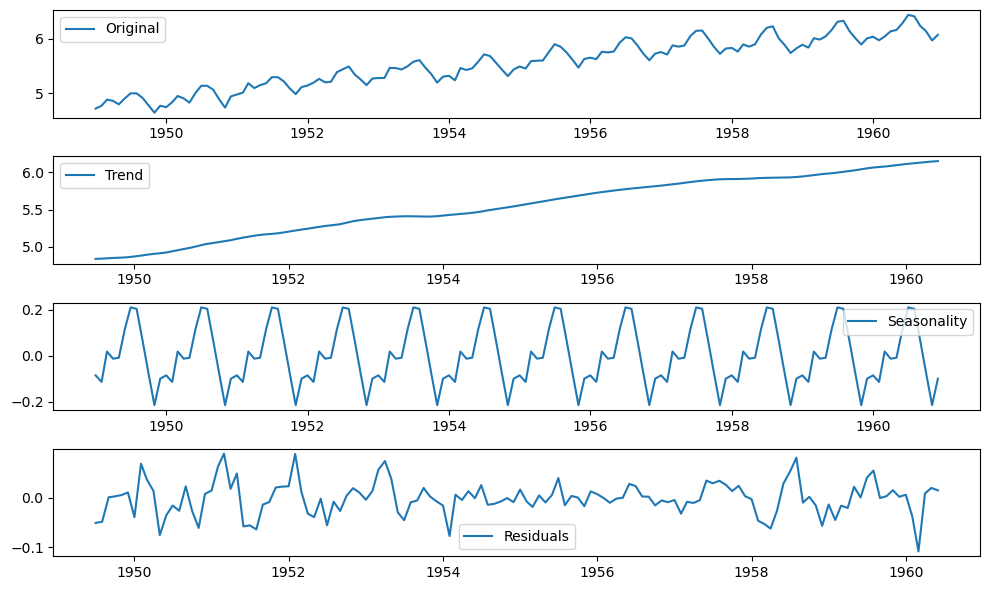

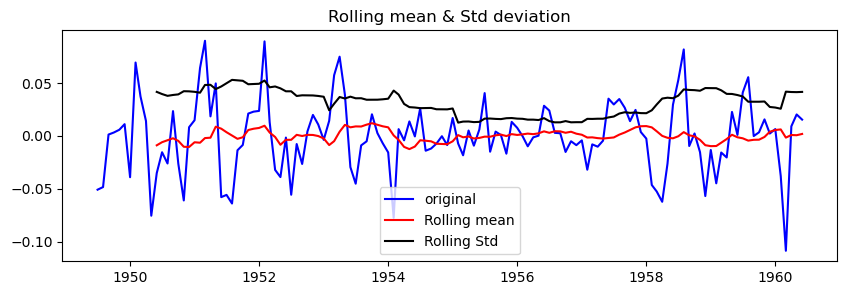

Result of Dickey Fuller test
test Statistics          -6.332387e+00
p-value                   2.885059e-08
#lag used                 9.000000e+00
Number of Observations    1.220000e+02
Critical Value (1%)      -3.485122e+00
Critical Value (5%)      -2.885538e+00
Critical Value (10%)     -2.579569e+00
dtype: float64


In [21]:
# now we will see the component of time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexData_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid  #residual are the irregularity present in the data

# plt.figure(figsize=(10,3))
plt.subplot(411)
plt.plot(indexData_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

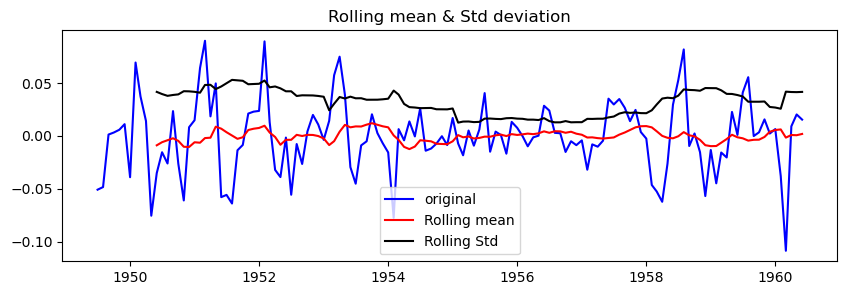

Result of Dickey Fuller test
test Statistics          -6.332387e+00
p-value                   2.885059e-08
#lag used                 9.000000e+00
Number of Observations    1.220000e+02
Critical Value (1%)      -3.485122e+00
Critical Value (5%)      -2.885538e+00
Critical Value (10%)     -2.579569e+00
dtype: float64


In [22]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

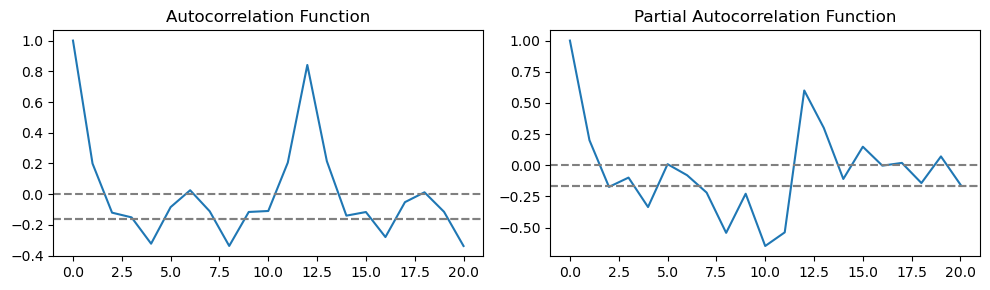

In [23]:
# now to get the value of ARIMA model parameter q and p we will acf and pacf graph
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dfLogDiffShift, nlags = 20)
lag_pacf = pacf(dfLogDiffShift, nlags = 20, method='ols')

# plot ACF
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dfLogDiffShift)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dfLogDiffShift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dfLogDiffShift)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dfLogDiffShift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


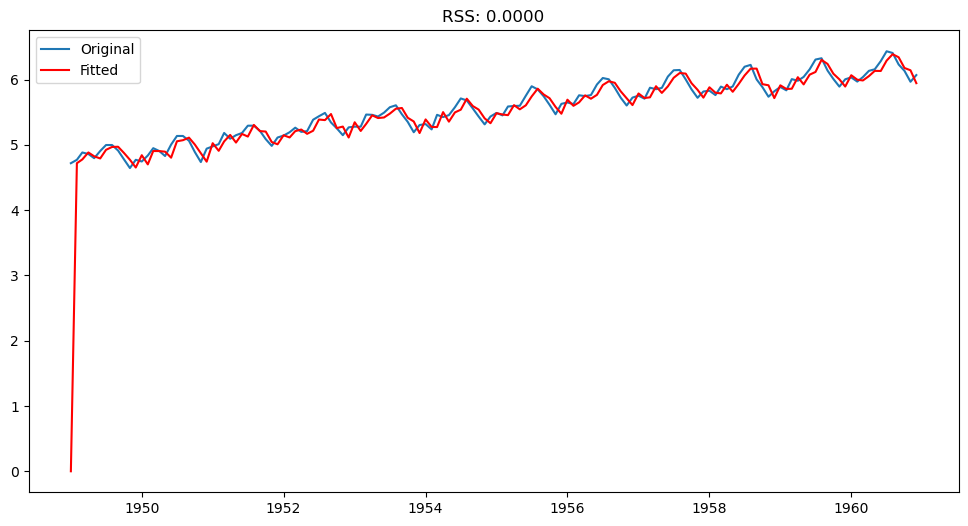

Plotting AR model


In [24]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Fit the ARIMA model
model = ARIMA(indexData_logScale, order=(2, 1, 2))
results_AR = model.fit()

# Calculate RSS
rss = np.sum((results_AR.fittedvalues - indexData_logScale)**2)

# If rss is a Series, convert it to a single value
if isinstance(rss, pd.Series):
    rss = rss.iloc[0]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(indexData_logScale, label='Original')
plt.plot(results_AR.fittedvalues, color='red', label='Fitted')
plt.title(f'RSS: {rss:.4f}')
plt.legend()
plt.show()

print('Plotting AR model')

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


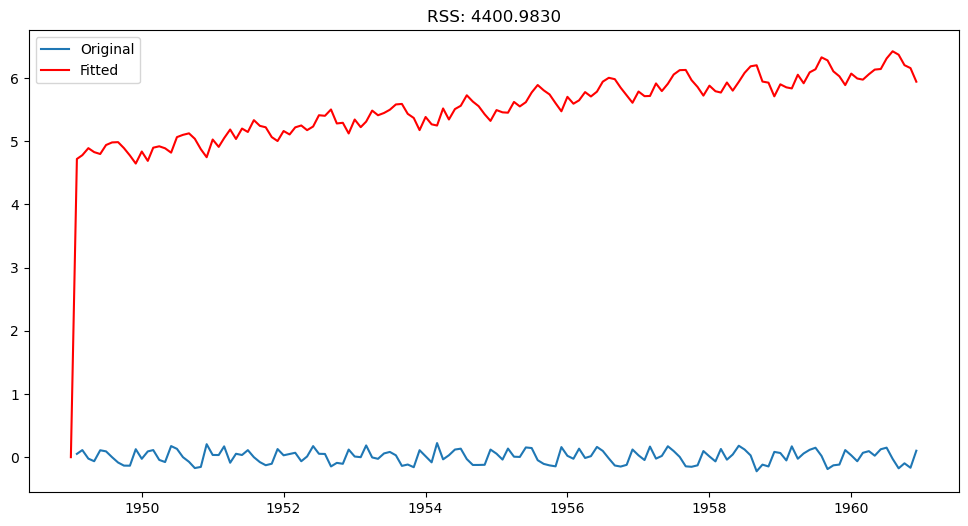

Plotting MA model


In [25]:
# Fit the ARIMA model
model = ARIMA(indexData_logScale, order=(0, 1, 2))
results_MA = model.fit()

# Calculate RSS
rss = np.sum((results_MA.fittedvalues - dfLogDiffShift['#Passengers'])**2)

# If rss is a Series, convert it to a single value
if isinstance(rss, pd.Series):
    rss = rss.iloc[0]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(dfLogDiffShift['#Passengers'], label='Original')
plt.plot(results_MA.fittedvalues, color='red', label='Fitted')
plt.title(f'RSS: {rss:.4f}')
plt.legend()
plt.show()

print('Plotting MA model')

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


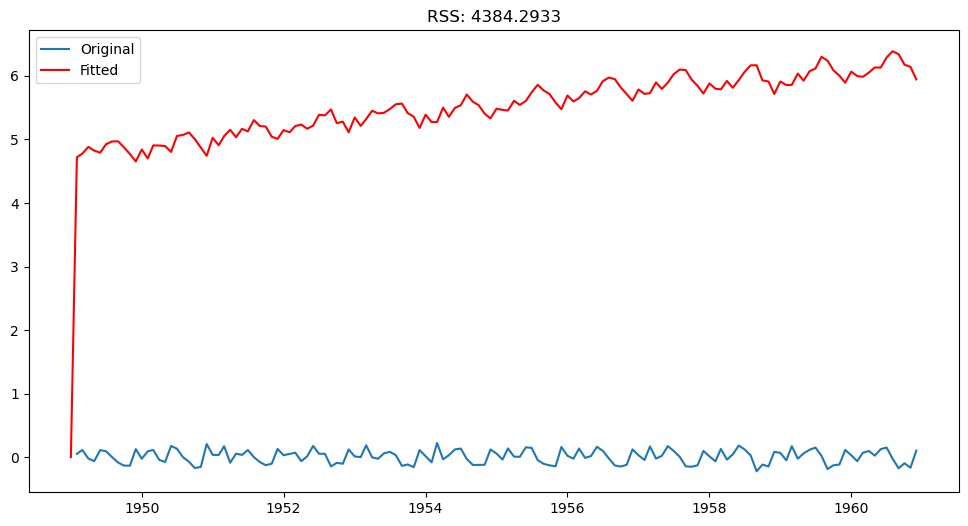

Plotting ARIMA model


In [26]:
# Fit the ARIMA model
model = ARIMA(indexData_logScale, order=(2, 1, 2))
results_ARIMA = model.fit()

# Calculate RSS
rss = np.sum((results_ARIMA.fittedvalues - dfLogDiffShift['#Passengers'])**2)

# If rss is a Series, convert it to a single value
if isinstance(rss, pd.Series):
    rss = rss.iloc[0]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(dfLogDiffShift['#Passengers'], label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted')
plt.title(f'RSS: {rss:.4f}')
plt.legend()
plt.show()

print('Plotting ARIMA model')

In [27]:
prediction_arima_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(prediction_arima_diff.head())

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883215
1949-05-01    4.824422
dtype: float64


In [28]:
# Assuming predictions_ARIMA_diff is your series of ARIMA predictions
prediction_arima_diff_cumsum = prediction_arima_diff.cumsum()
print(prediction_arima_diff_cumsum.head())

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494884
1949-04-01    14.378098
1949-05-01    19.202520
dtype: float64


In [29]:
# prediction for fitted values
predictions_ARIMA_log = pd.Series(indexData_logScale['#Passengers'].iloc[0], index=indexData_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(prediction_arima_diff_cumsum, fill_value=0)
print(predictions_ARIMA_log.head())

Month
1949-01-01     4.718499
1949-02-01     9.436998
1949-03-01    14.213382
1949-04-01    19.096597
1949-05-01    23.921019
dtype: float64


In [38]:
# Clipping values to avoid overflow
clipped_predictions_ARIMA_log = np.clip(predictions_ARIMA_log, None, 700)
prediction_ARIMA = np.exp(clipped_predictions_ARIMA_log)

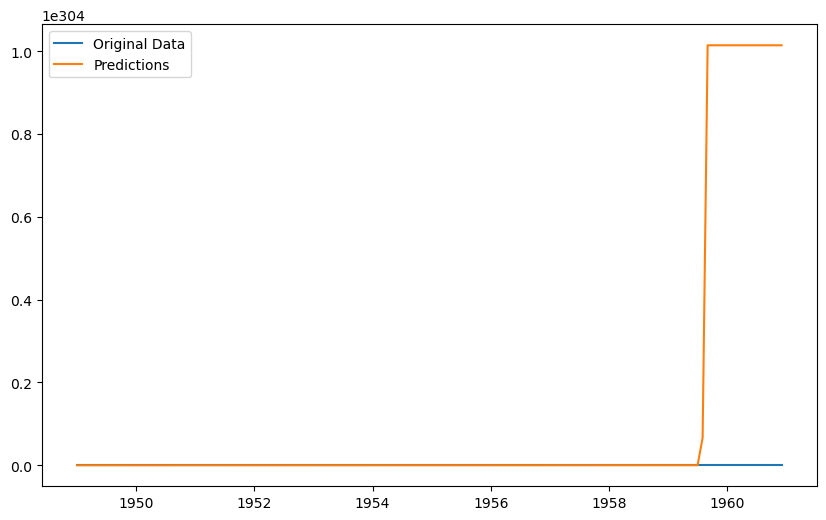

In [39]:
# Plotting the original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(indexData, label='Original Data')
plt.plot(prediction_ARIMA, label='Predictions')
plt.legend()
plt.show()

In [37]:
indexData.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [45]:
results_ARIMA.forecast(steps=120)

1961-01-01    6.157565
1961-02-01    6.122237
1961-03-01    6.137510
1961-04-01    6.131766
1961-05-01    6.134458
                ...   
1970-08-01    6.134126
1970-09-01    6.134126
1970-10-01    6.134126
1970-11-01    6.134126
1970-12-01    6.134126
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64